<a href="https://colab.research.google.com/github/dustinak80/Deep_Learning/blob/Duong/Copy_of_MATH6373_HW2_Duong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
#import packages
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from numpy.random import seed
seed(6373)
tf.random.set_seed(6373)

TensorFlow 2.x selected.


# 1. Data Exploration

In [2]:
#Read input file
df_train=np.loadtxt('https://raw.githubusercontent.com/duonghung86/ECG-heartbeat/master/train.csv',
                    delimiter=",", dtype='float32',skiprows=1)
df_train[:5,:10]

array([[0.96880734, 0.89724773, 0.37431192, 0.        , 0.07339449,
        0.18715596, 0.23302752, 0.27522936, 0.27706423, 0.27155963],
       [1.        , 0.82451254, 0.47632313, 0.00557103, 0.17270195,
        0.3091922 , 0.40389973, 0.40389973, 0.4317549 , 0.42339832],
       [1.        , 0.5218855 , 0.03030303, 0.11111111, 0.10437711,
        0.11447811, 0.1010101 , 0.11447811, 0.1010101 , 0.10774411],
       [1.        , 0.5359712 , 0.5611511 , 0.57194245, 0.5683453 ,
        0.5215827 , 0.528777  , 0.47841728, 0.34172663, 0.19784173],
       [0.9866221 , 0.93534005, 0.8762542 , 0.8037904 , 0.7212932 ,
        0.6098105 , 0.49275362, 0.3522854 , 0.24972129, 0.17948718]],
      dtype=float32)

In [3]:
df_test=np.loadtxt('https://raw.githubusercontent.com/duonghung86/ECG-heartbeat/master/test.csv',
                   delimiter=",", dtype='float32',skiprows=1)
df_test[:5,:10]

array([[0.9662309 , 0.92156863, 0.8649238 , 0.8137255 , 0.72331154,
        0.6383442 , 0.5217865 , 0.39978212, 0.2788671 , 0.22004357],
       [0.87946427, 0.828125  , 0.74553573, 0.57589287, 0.41964287,
        0.3392857 , 0.33035713, 0.35714287, 0.4642857 , 0.39285713],
       [1.        , 0.92167103, 0.78851175, 0.31853786, 0.11488251,
        0.15665796, 0.16449086, 0.07310705, 0.06005222, 0.05744125],
       [0.8844847 , 0.8278596 , 0.7734994 , 0.7191393 , 0.6455266 ,
        0.5549264 , 0.4450736 , 0.33861834, 0.23216309, 0.17667045],
       [0.5862069 , 0.12539186, 0.        , 0.11285266, 0.1630094 ,
        0.12852664, 0.169279  , 0.1661442 , 0.20689656, 0.24451411]],
      dtype=float32)

In [77]:
# change the label to  0, 1, and 2
import seaborn as sns
y_train=df_train[:,187].copy()
y_train[y_train==4]=1
y_train=y_train.astype('int8')
#sns.distplot(y_train)
#plt.show()
#plt.hist(y_train)
#plt.show()
y_train[:10]

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 2], dtype=int8)

In [78]:
# apply the same thing for test set
y_test=df_test[:,187].copy()
y_test[y_test==4]=1
y_test=y_test.astype('int8')
#sns.distplot(y_test)
#plt.show()
#plt.hist(y_test)
#plt.show()
y_test[:10]

array([1, 2, 0, 1, 0, 2, 1, 0, 1, 0], dtype=int8)

In [79]:
X_train=df_train[:,:187].copy()
print(df_train.shape)
print(X_train.shape)
X_test=df_test[:,:187].copy()
print(df_test.shape)
print(X_test.shape)

(14975, 188)
(14975, 187)
(3744, 188)
(3744, 187)


# 2. Define MLP structure


# 3. Select 2 tentative sizes h for the hidden layer

## 3.1. h95



In [0]:
plt.rcParams['figure.figsize'] = (12,8)

0.9508588851895183
35


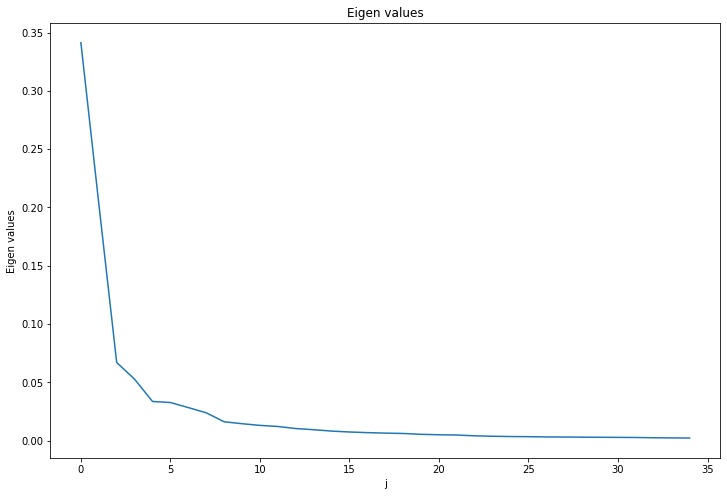

In [83]:
from sklearn.preprocessing import StandardScaler as SS
standardize=SS()
scaled_X_train = standardize.fit_transform(X_train)
pca = PCA(0.95) # apply pca for 95%
pca.fit(scaled_X_train)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('j')
plt.ylabel('Eigen values')
plt.title('Eigen values')
print(sum(pca.explained_variance_ratio_))
h95 = pca.n_components_
print(h95)

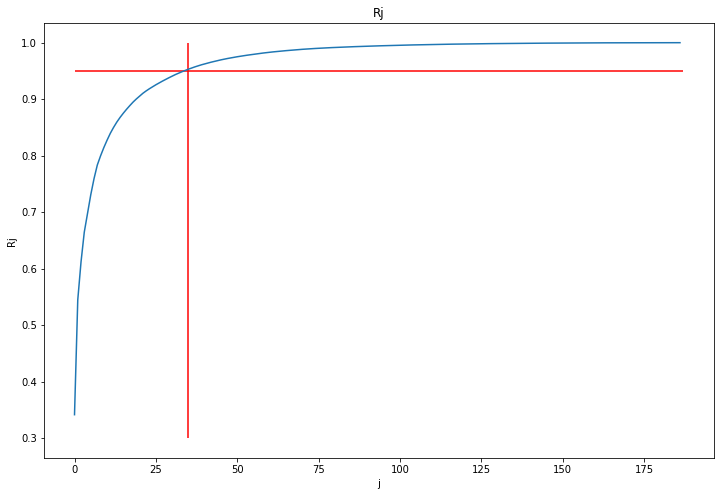

In [84]:
#Verify
pca = PCA(187)
pca.fit(scaled_X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.hlines(0.95,0,187,'r')
plt.vlines(35,0.3,1,'r')
plt.xlabel('j')
plt.ylabel('Rj')
plt.title('Rj')
plt.show()

## 3.2 hL

In [87]:
hL=0
for i in range(3):
  Mj=scaled_X_train[y_train==i,:].copy()
  standardize=SS()
  Mj = standardize.fit_transform(Mj)  
  
  pca_Mij=PCA(0.95)
  pca_Mij.fit(Mj)
  hL+=pca_Mij.n_components_
  print(hL)

42
62
91


In [9]:
hL= 93
#for i in range(3):
#  pca_Mij=PCA(0.95)
#  pca_Mij.fit(X_train[y_train==i,:])
#  hL+=pca_Mij.n_components_
#  print(hL)
hL

93

# 5. Impact of various learning options

-dimension h  of H   
-batch size  
-initialization  
-gradient descent step size  

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.initializers import RandomNormal, RandomUniform, TruncatedNormal
from tensorflow.keras import optimizers, losses
from tensorflow.keras import callbacks
from time import time

In [0]:
#Just for running the def Model_Search() since I set these values equal to values
h = 35
Initializer = RandomNormal(mean=0.0, stddev=0.05, seed=6373)
B = 100
decay_rate = 0.4

In [0]:
### Use your own layer size and initializers. Refer to https://keras.io/initializers/. ####
def Model_Search(X_train, y_train, X_test, y_test, layerH_dim = h, Initializer = Initializer, B = B, decay_rate = decay_rate):
  
  #Build the Model for Keras
  layer1_dim=X_train.shape[1]
  layerH_dim=layerH_dim
  layer2_dim=3

  #D = layer1_dim*layerH_dim + layerH_dim + layerH_dim*layer2_dim + layer2_dim

  # Setup the layer
  model = Sequential()

  # From layer 1 to layer H, we use RELU
  # the initial Weights and Thresholds are kernel and bias
  # Random normal = random from normal distribution (mean=0.0, stddev=0.05, seed=None)
  model.add(Dense(layerH_dim, activation='relu', input_dim=layer1_dim, 
                kernel_initializer=Initializer,
                bias_initializer=Initializer))

  # From layer H to 2, then softmax
  model.add(Dense(layer2_dim, activation='softmax', 
                kernel_initializer=Initializer, 
                bias_initializer=Initializer))

  ###### Configure your own learning rate schedule and mini-batch size. #########

  # Choose batch size
  B = 100
  N=X_train.shape[0] # number of cases in train set
  # Our task is classification and we use cross entropy so
  loss_func = losses.CategoricalCrossentropy()

  # Define learning rate
  lr_schedule = optimizers.schedules.ExponentialDecay(initial_learning_rate=0.1,
                                                    decay_steps=N/B, 
                                                    decay_rate=np.exp(-decay_rate), 
                                                    staircase=True)

  # Because of using batch, Stochastic Gradient Descent optimizer is a must
  model.compile(optimizer=optimizers.SGD(learning_rate=lr_schedule), 
              loss=loss_func,
              metrics=['accuracy'])

  # For saving the best model during the whole training process.
  checkpointer = callbacks.ModelCheckpoint(filepath='BestModel.h5', monitor='val_loss', save_best_only=True)

  #### Interrupt training if `val_loss` stops improving for over 10 epochs #######
  stop_learn= tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss')
  # Save the weight at the end of each epoch
  #weight_record = tf.keras.callbacks.ModelCheckpoint('weights{epoch:08d}.h5', 
                                    # save_weights_only=True)
  epo=100

  # Fit the model
  Monitor = model.fit(X_train, y_train, 
                    epochs=epo, 
                    batch_size=B, 
                    callbacks=[checkpointer,stop_learn],
                    validation_data=(X_test, y_test),
                    verbose = 0
                    )
  
  return Monitor.history['loss'], Monitor.history['val_loss'], Monitor.history['accuracy'], Monitor.history['val_accuracy']

In [0]:
#plot
def plot(results):
  keys = results.keys()

  #determine amount of plots
  n = len(keys)
  fig1, ax1 = plt.subplots(n,1, figsize = (12, n*5))
  fig2,ax2 = plt.subplots(n,1, figsize = (12,n*5))

  #Plot the plots
  count = 0
  max_acc = 0
  for i in keys:
    ax1[count].plot(results[i]['loss'])
    ax1[count].set_xlabel('Epoch')
    ax1[count].set_ylabel('Average Cross Entropy')
    ax1[count].set_title('Loss for value {}'.format(i))
    
    ax2[count].plot(results[i]['accuracy'], c = 'b')
    ax2[count].plot(results[i]['val_accuracy'], c = 'r')
    ax2[count].set_xlabel('Epoch')
    ax2[count].set_ylabel('Average Accuracy')
    ax2[count].legend(['Train', 'Test'])
    ax2[count].set_title('Accuracy for value {}'.format(i))

    count += 1

    #Get the best key (using the highest accuracy)
    key_max = max(results[i]['val_accuracy'])
    if key_max > max_acc:
      max_acc = key_max
      best_key = i
  
  plt.show()
  return best_key

#### Get the Y values in proper format

In [0]:
# Convert labels to one hot encodings
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)

### Hidden Layer Dimensions:

In [0]:
h=[35, 93]

h_results = {}
delta_times = []
for i in h:
  a = time()
  loss, val_loss, accuracy, val_accuracy = Model_Search(X_train, y_train, X_test, y_test, layerH_dim= i)
  h_results[i] = {'loss' : loss,
                  'val_loss': val_loss,
                  'accuracy': accuracy,
                  'val_accuracy': val_accuracy}
  delta_times += [time()-a]

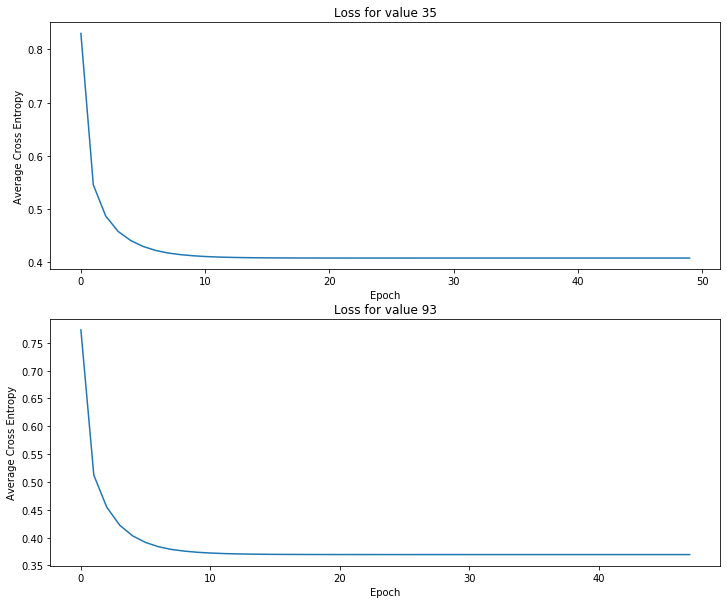

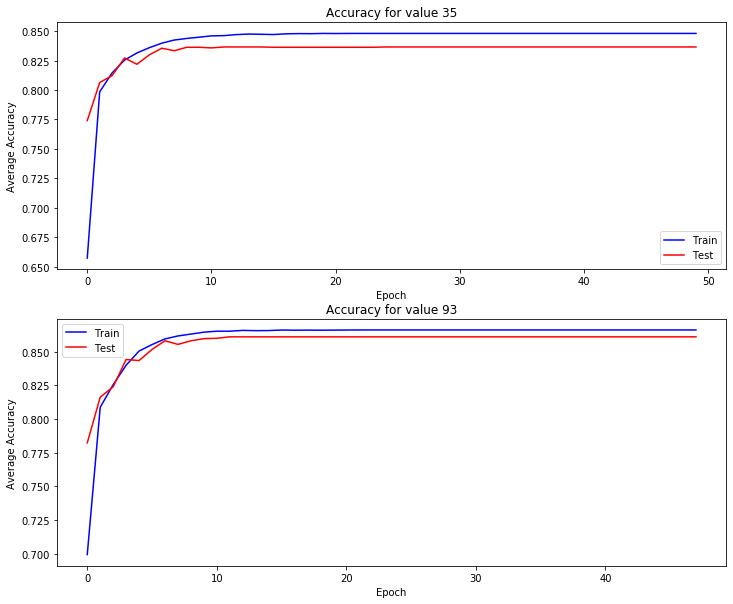

Number of Epochs: 48
Best Hidden Layer Dimension: 93
[13.83647608757019, 13.753803491592407]


In [16]:
best_h = plot(h_results)
print('Number of Epochs: {}\nBest Hidden Layer Dimension: {}'.format(len(h_results[i]['loss']), best_h))
print(delta_times)

In [0]:
##Run 1 for comparison of seed
#h_results[93]['loss']

In [0]:
##Run 2 for comparison of see
#h_results[93]['loss']

### Batch Size
-best Hidden Layer Dimension = 93 (50 Epochs before kicking out)

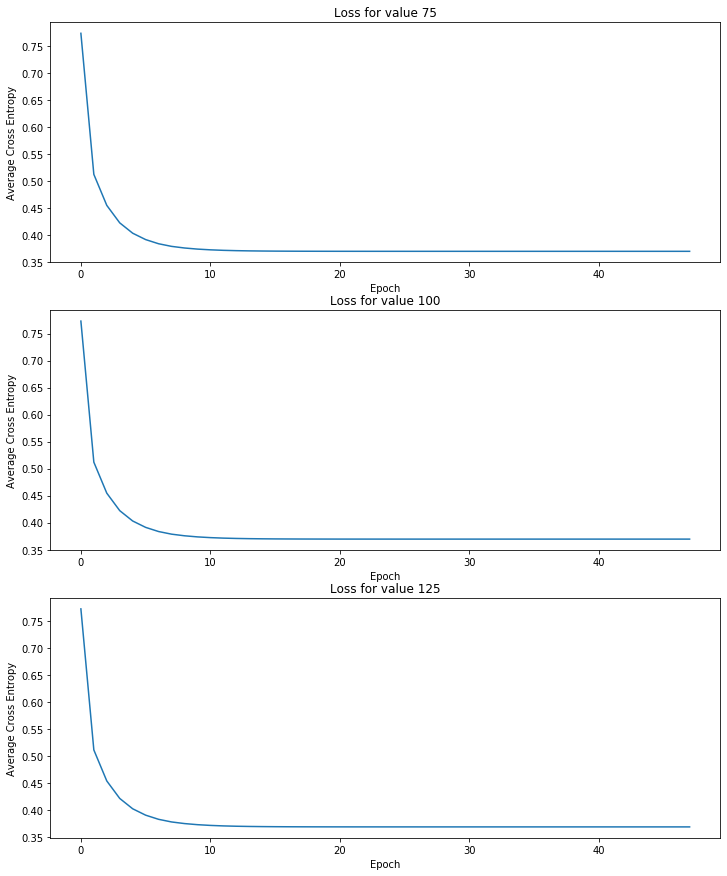

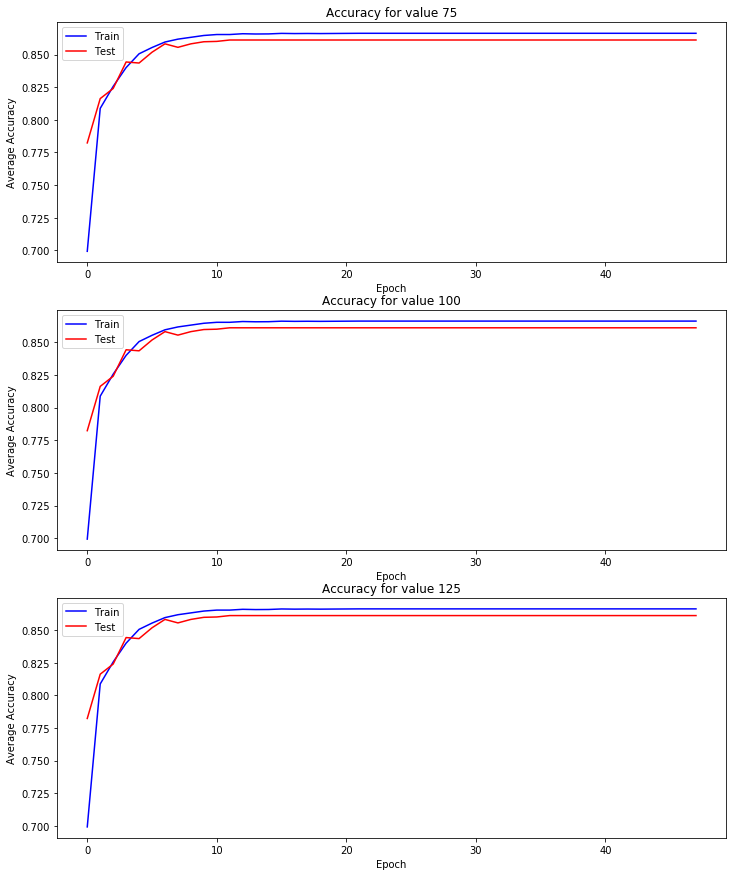

Number of Epochs: 48
Best Number of Batches Dimension: 75
[14.031039714813232, 13.976709604263306, 14.168317079544067]


In [17]:
#Play with Batch Values
B=[75, 100, 125]

B_results = {}
delta_times = []
for i in B:
  a = time()
  loss, val_loss, accuracy, val_accuracy = Model_Search(X_train, y_train, X_test, y_test, layerH_dim=best_h, B = i)
  B_results[i] = {'loss' : loss,
                  'val_loss': val_loss,
                  'accuracy': accuracy,
                  'val_accuracy': val_accuracy}
  delta_times += [time()-a]

best_B = plot(B_results)
print('Number of Epochs: {}\nBest Number of Batches Dimension: {}'.format(len(B_results[i]['loss']), best_B))
print(delta_times)

In [0]:
print('Number of Epochs: {}\nBest Number of Batches Dimension: {}'.format(len(B_results[i]['loss']), best_B))
print(delta_times)

Number of Epochs: 48
Best Number of Batches Dimension: 75
[19.713186740875244, 18.66536021232605, 18.795774459838867]


### Best Initilization Results
-best Hidden Layer Dimension = 93  (49 Epochs before kicking out)  
-best batch values = 100 (with 51 Epochs before kicking out)  

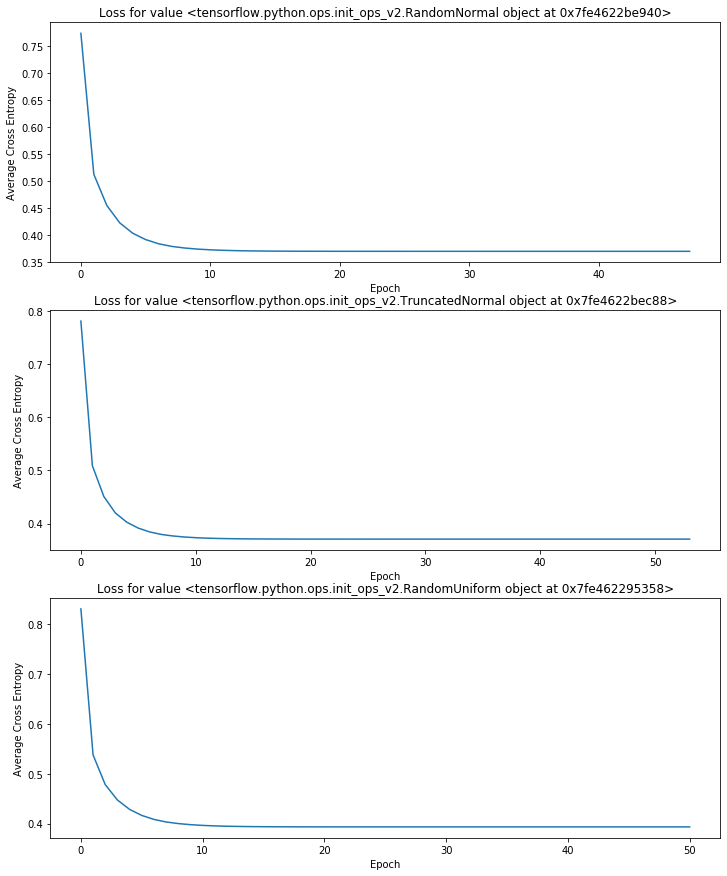

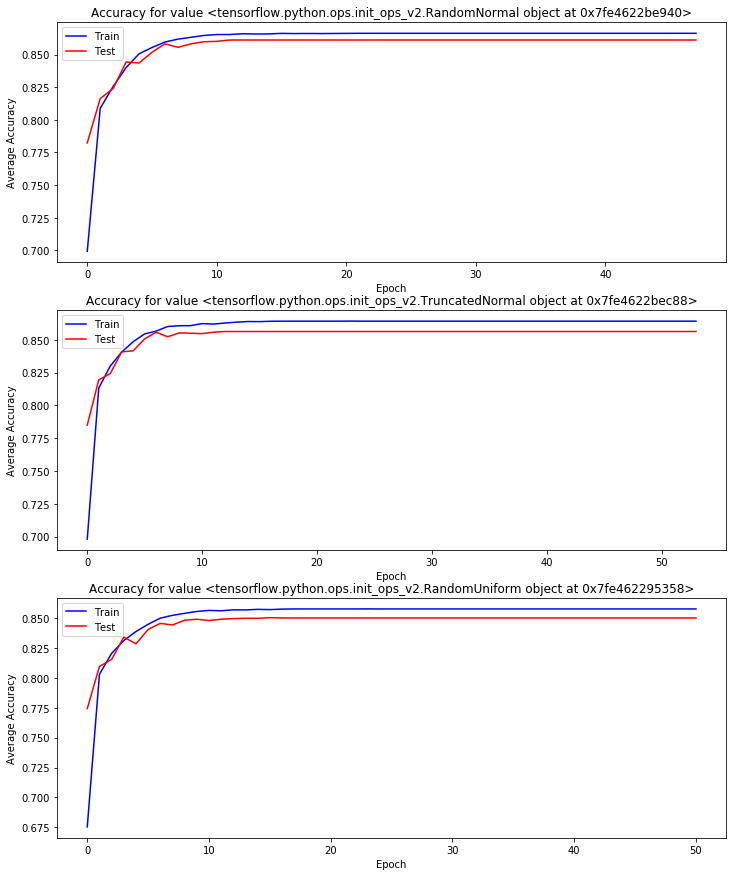

Number of Epochs: 51
Best Initialization Method Dimension: <tensorflow.python.ops.init_ops_v2.RandomNormal object at 0x7fe4622be940>
[13.725403547286987, 15.584158897399902, 14.82908844947815]


In [18]:
#Play with Initialization Methods
Initializer = [RandomNormal(mean=0.0, stddev=0.05, seed=6373),
               TruncatedNormal(mean=0.0, stddev=0.05, seed=6373),
               RandomUniform(minval=-0.05, maxval=0.05, seed=6373)]

Init_results = {}
delta_times = []
for i in Initializer:
  a = time()
  loss, val_loss, accuracy, val_accuracy = Model_Search(X_train, y_train, X_test, y_test, layerH_dim=best_h, B = best_B, Initializer=i)
  Init_results[i] = {'loss' : loss,
                  'val_loss': val_loss,
                  'accuracy': accuracy,
                  'val_accuracy': val_accuracy}
  delta_times += [time() - a]

best_Init = plot(Init_results)
print('Number of Epochs: {}\nBest Initialization Method Dimension: {}'.format(len(Init_results[i]['loss']), best_Init))
print(delta_times)

### Best Decay Rate Results
-best Hidden Layer Dimension = 93  (49 Epochs before kicking out)  
-best batch values = 100 (with 51 Epochs before kicking out)  
-best initialization method for params = RandomNormal (53 Epochs before kicking out)

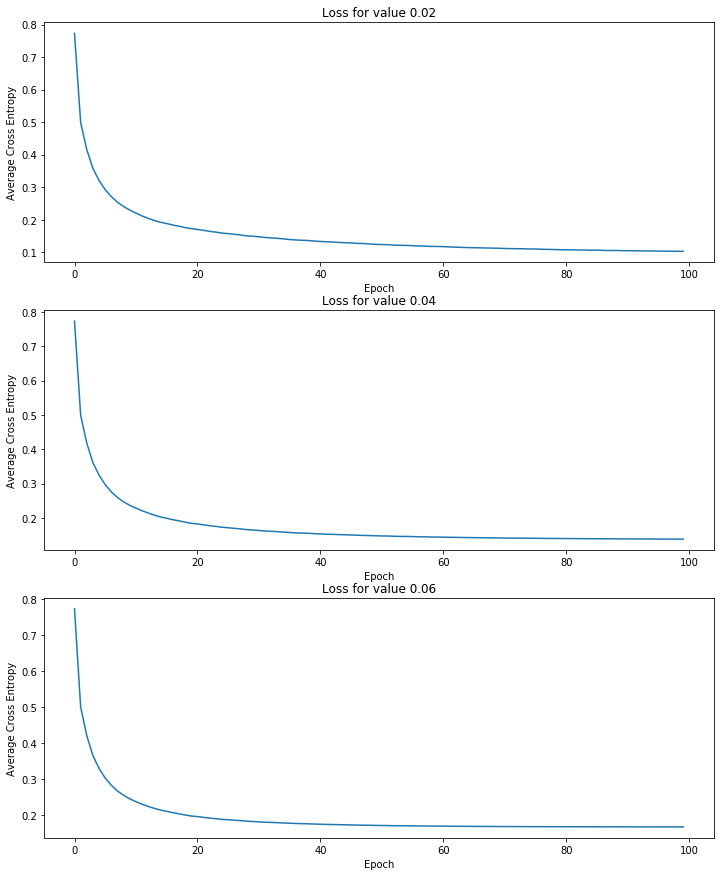

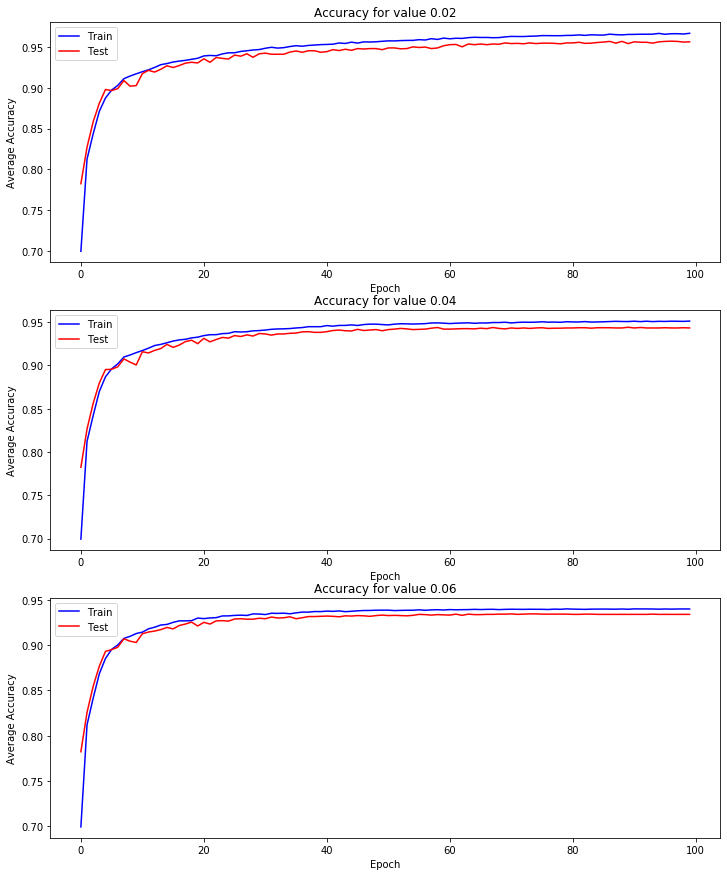

Number of Epochs: 100
Best Decay Rate Dimension: 0.02
[28.492955446243286, 28.749581336975098, 28.460633754730225]


In [19]:
#Play with Decay Rates
decay_rate = [.02, .04, .06]

decay_results = {}
delta_times = []
for i in decay_rate:
  a = time()
  loss, val_loss, accuracy, val_accuracy = Model_Search(X_train, y_train, X_test, y_test, layerH_dim=best_h, B = best_B, Initializer=best_Init, decay_rate = i)
  decay_results[i] = {'loss' : loss,
                  'val_loss': val_loss,
                  'accuracy': accuracy,
                  'val_accuracy': val_accuracy}
  delta_times += [time() - a]

best_decay = plot(decay_results)
print('Number of Epochs: {}\nBest Decay Rate Dimension: {}'.format(len(decay_results[i]['loss']), best_decay))
print(delta_times)

### Best Parameters
-best Hidden Layer Dimension = 93  (49 Epochs before kicking out)  
-best batch values = 100 (with 51 Epochs before kicking out)  
-best initialization method for params = RandomNormal (53 Epochs before kicking out)  
-best decay rate = 0.02 (Using all 100 Epochs)

# 4. Implementation

### Using the best results showed later in the search pattern

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.initializers import RandomNormal, RandomUniform, TruncatedNormal

# Use your own layer size and initializers. Refer to https://keras.io/initializers/.
layer1_dim=X_train.shape[1]
#layerH_dim=best_h
layerH_dim=35

layer2_dim=3

D = layer1_dim*layerH_dim + layerH_dim + layerH_dim*layer2_dim + layer2_dim

# Setup the layer
model = Sequential()

#Edit the initializers
Initializer = best_Init

# From layer 1 to layer H, we use RELU
# the initial Weights and Thresholds are kernel and bias
# Random normal = random from normal distribution (mean=0.0, stddev=0.05, seed=None)
model.add(Dense(layerH_dim, activation='relu', input_dim=layer1_dim, 
                kernel_initializer=Initializer,
                bias_initializer=Initializer))

# From layer H to 2, then softmax
model.add(Dense(layer2_dim, activation='softmax', 
                kernel_initializer=Initializer, 
                bias_initializer=Initializer))

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

- *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
- *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
- *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

#### learning rate with exponetial decay 

- initial_learning_rate: A scalar float32 or float64 Tensor or a Python number. The initial learning rate.
- decay_steps: A scalar int32 or int64 Tensor or a Python number. Must be positive. See the decay computation above.
- decay_rate: A scalar float32 or float64 Tensor or a Python number. The decay rate.
- staircase: Boolean. If True decay the learning rate at discrete intervals
name: String. Optional name of the operation. Defaults to 'ExponentialDecay'.

In [0]:
from tensorflow.keras import optimizers, losses

# Configure your own learning rate schedule and mini-batch size.

# Choose batch size
B = best_B
N=X_train.shape[0] # number of cases in train set
decay_rate = np.exp(-best_decay)
# Our task is classification and we use cross entropy so
loss_func = losses.CategoricalCrossentropy()

# Define learning rate
lr_schedule = optimizers.schedules.ExponentialDecay(initial_learning_rate=0.1,
                                                    decay_steps=N/B, 
                                                    decay_rate=decay_rate, 
                                                    staircase=True)

# Because of using batch, Stochastic Gradient Descent optimizer is a must
model.compile(optimizer=optimizers.SGD(learning_rate=lr_schedule), 
              loss=loss_func,
              metrics=['accuracy'])

 We will choose metrics later
 

In [0]:
from tensorflow.keras import callbacks

# For recording gradients and training loss over the whole training set
# at the end of each epoch.

class MyHistory(callbacks.Callback):
    # Set empty list for values we want to retrieve at the begining
    def on_train_begin(self, logs={}):
        self.grads = []
        self.gradsNorm = []
        self.train_loss = []
        self.test_loss = []
        self.weight=[]
        self.WC = []
        #Track some of the batch values
        self.bW = []
        self.b_WC = [] #change in weight size for every batch (page 3)
        self.bavCRE = [] #loss for each batch (page 3)
        self.bG = [] # batch Gradiend Descent (end of page 2)
        self.bGD = [] # Wants Size of batch gradient plotted each batch (page 3)

    # Define what values to keep at the end of each batch
    def on_batch_end(self, batch, logs):
        
        #Get the Batch Average CRE (Loss)
        self.bavCRE.append(logs.get('loss')) #plot
        
        # Weight
        modelWeights = [] # Vector W at the batch n 
        for layer in model.layers:
          layerWeights = []
          # Retrieve the weight and threshold from each layer
          for weight in layer.get_weights():
            layerWeights=np.concatenate([layerWeights,weight.flatten()])
          modelWeights=np.concatenate([modelWeights,layerWeights])
        # Store it 
        self.bW.append(modelWeights)

        if len(self.bW)>2:
          diff = (self.bW[-1]- self.bW[-2])
          self.bG.append( diff / decay_rate )
          self.b_WC.append( np.linalg.norm(diff)/np.linalg.norm(self.bW[-1]) ) #Plot
          self.bGD.append( np.linalg.norm(self.bG[-1]) / np.sqrt(D) ) #plot

    # Define what values we want to retrieve at the ending of epoch
    def on_epoch_end(self, epoch, logs={}):

        # Define gradient or Gi
        with tf.GradientTape() as tape:
          #train set
          y_pred = self.model(X_train)
          loss_value = loss_func(y_train,y_pred) # avCRE
          #test set
          test_y_pred = self.model(X_test)
          test_loss_value = loss_func(y_test, test_y_pred)

        #WHAT IS THIS DOING???
        grad = tape.gradient(loss_value, model.trainable_weights) # gradient(avCRE,W)
        self.grads.append(grad)

        self.gradsNorm.append(np.sqrt(sum([np.sum(np.square(g.numpy())) for g in grad])))
        
        # Weight
        modelWeights = [] # Vector W at the Epoch n 
        for layer in model.layers:
          layerWeights = []
          # Retrieve the weight and threshold from each layer
          for weight in layer.get_weights():
            layerWeights=np.concatenate([layerWeights,weight.flatten()])
          modelWeights=np.concatenate([modelWeights,layerWeights])
        # Store it 
        self.weight.append(modelWeights)

        #Get the value of loss and store it
        self.train_loss.append(loss_value.numpy())
        self.test_loss.append(test_loss_value.numpy())

GradsReal_loss = MyHistory()

# For saving the best model during the whole training process.

checkpointer = callbacks.ModelCheckpoint(filepath='BestModel.h5', monitor='val_loss', save_best_only=True)

- Train the model and store validation loss history in 'Monitor'.
- Be carefual that in Keras, the "loss" of each epoch (stored in 'Monitor.history['loss']') is calculated as the average of the losses of mini-batches in that epoch - bavCREn. 
- Vector Gn is stored in GradsReal_loss.grads
- For the real epoch loss over the whole training set, use 'GradsReal_loss.real_loss' instead. This is avCRE
- But it is safe to use 'Monitor.history['val_loss']' for validation losses.

In [50]:
# Interrupt training if `val_loss` stops improving for over 10 epochs
stop_learn= tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss')
# Save the weight at the end of each epoch
#weight_record = tf.keras.callbacks.ModelCheckpoint('weights{epoch:08d}.h5', 
                                    # save_weights_only=True)
epo=100

# Fit the model
Monitor = model.fit(X_train, y_train, 
                    epochs=epo, 
                    batch_size=B, 
                    callbacks=[GradsReal_loss, checkpointer,stop_learn],
                    validation_data=(X_test, y_test),
                    )

Train on 14975 samples, validate on 3744 samples
Epoch 1/100
14975/14975 [==============================] - 1s 60us/sample - loss: 0.7667 - accuracy: 0.6902 - val_loss: 0.5681 - val_accuracy: 0.7775
Epoch 2/100
14975/14975 [==============================] - 1s 38us/sample - loss: 0.4877 - accuracy: 0.8151 - val_loss: 0.4659 - val_accuracy: 0.8371
Epoch 3/100
14975/14975 [==============================] - 1s 38us/sample - loss: 0.4046 - accuracy: 0.8485 - val_loss: 0.3762 - val_accuracy: 0.8646
Epoch 4/100
14975/14975 [==============================] - 1s 39us/sample - loss: 0.3401 - accuracy: 0.8776 - val_loss: 0.3251 - val_accuracy: 0.8894
Epoch 5/100
14975/14975 [==============================] - 1s 40us/sample - loss: 0.2994 - accuracy: 0.8946 - val_loss: 0.2869 - val_accuracy: 0.9073
Epoch 6/100
14975/14975 [==============================] - 1s 36us/sample - loss: 0.2702 - accuracy: 0.9036 - val_loss: 0.2618 - val_accuracy: 0.9079
Epoch 7/100
14975/14975 [==========================

### Plotting the Loss at the end of each Batch (n)

Text(0.5, 1.0, 'Average Batch Cross Entropy - h = hL= 35')

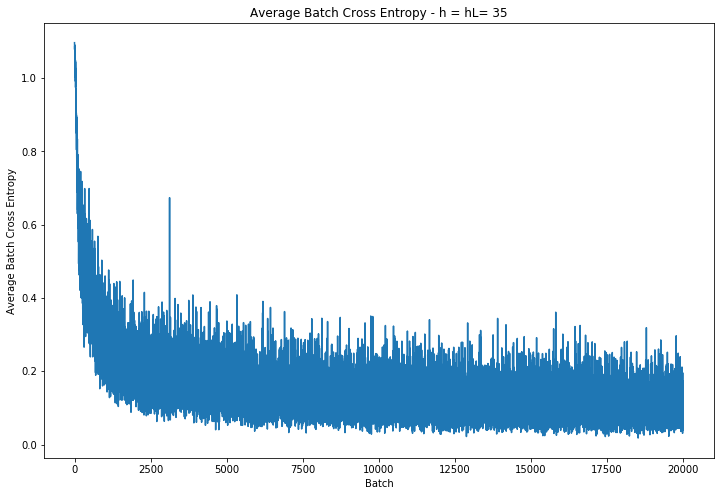

In [51]:
#At the end of each Batch (n)
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(GradsReal_loss.bavCRE)
ax.set_xlabel('Batch')
ax.set_ylabel('Average Batch Cross Entropy')
ax.set_title('Average Batch Cross Entropy - h = hL= 35')

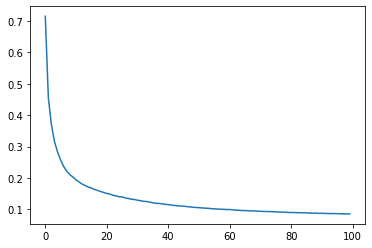

In [27]:
#At the end of each Epoch (m)
plt.plot(Monitor.history['loss']) #Loss of Training Set
#plt.plot(Monitor.history['val_loss']) #Validation Loss

### Plotting the size of weight change at the end of each Batch (n)

Text(0.5, 1.0, 'Weight Change Ratio - h = hL= 35')

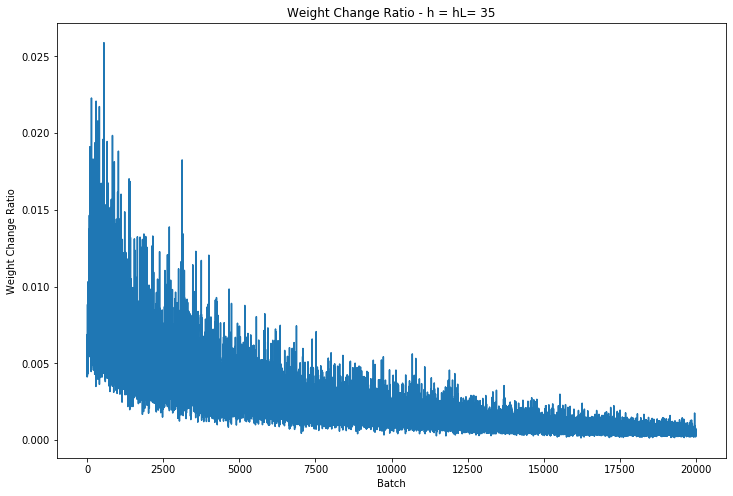

In [52]:
#At the end of each batch (n)
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(GradsReal_loss.b_WC)
ax.set_xlabel('Batch')
ax.set_ylabel('Weight Change Ratio')
ax.set_title('Weight Change Ratio - h = hL= 35')

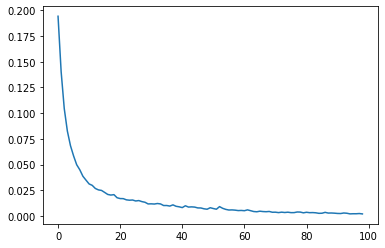

In [29]:
#At the end of Each Epoch(m)
from numpy import linalg as LA
def ratio(arr1,arr2):
  return(LA.norm(arr2-arr1)/LA.norm(arr1))
weight_ratio=[]
D=len(GradsReal_loss.weight[0])
epo_real=len(GradsReal_loss.weight) # the number of ran epoch
# it is <= epo because of interrupt learning
for i in range(epo_real-1):
  weight_ratio.append(ratio(GradsReal_loss.weight[i],GradsReal_loss.weight[i+1]))

plt.plot(weight_ratio)


### Plotting the ||G(n)|| at the end of each Batch (n)


In [36]:
GNn=[LA.norm(x) for x in GradsReal_loss.bG]
GNn[:10]

[0.036744324343871086,
 0.028945534434990077,
 0.032424389475610105,
 0.02251096376953749,
 0.030489353138986267,
 0.024579811112935765,
 0.0242627356003488,
 0.028277390146494732,
 0.03122446732132119,
 0.02882306505487449]

In [54]:
len(GradsReal_loss.bG[0])

6688

Text(0.5, 1.0, '||G(n)|| per batch - h = hL= 93')

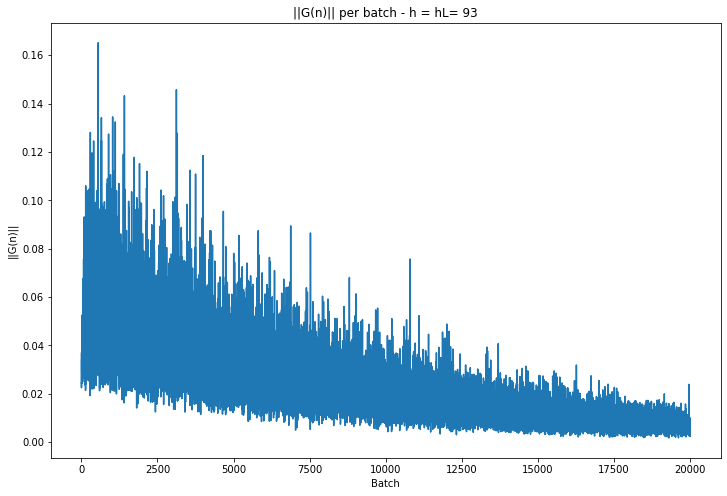

In [43]:
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(GNn)
ax.set_xlabel('Batch')
ax.set_ylabel('||G(n)||')
ax.set_title('||G(n)|| per batch - h = hL= 93')

### Plotting the ||G(n)||/d at the end of each Batch (n)

Text(0.5, 1.0, '||G(n)||/d per batch - h=hL=35 ')

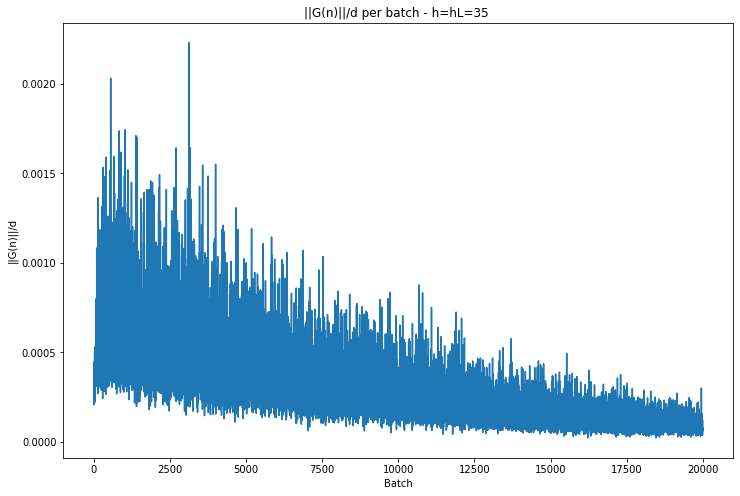

In [53]:
#At the end of each batch (n)
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(GradsReal_loss.bGD)
ax.set_xlabel('Batch')
ax.set_ylabel('||G(n)||/d')
ax.set_title('||G(n)||/d per batch - h=hL=35 ')

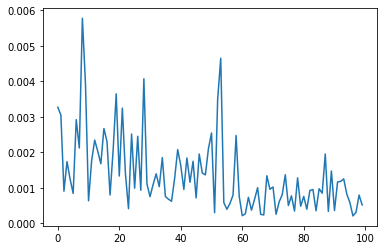

In [0]:
#At the end of each Epoch (m)
plt.plot(GradsReal_loss.gradsNorm/np.sqrt(D))

## Epoch Evaluations

val_loss is the value of cost function for your cross-validation data and loss is the value of cost function for your training data

In [0]:
#plt.plot(Monitor.history['accuracy']) #Accuracy of Training Set
#plt.plot(Monitor.history['val_accuracy']) #Accuracy of Validation Set

In [0]:
#plt.plot(GradsReal_loss.gradsNorm)

# 5. Performance analysis


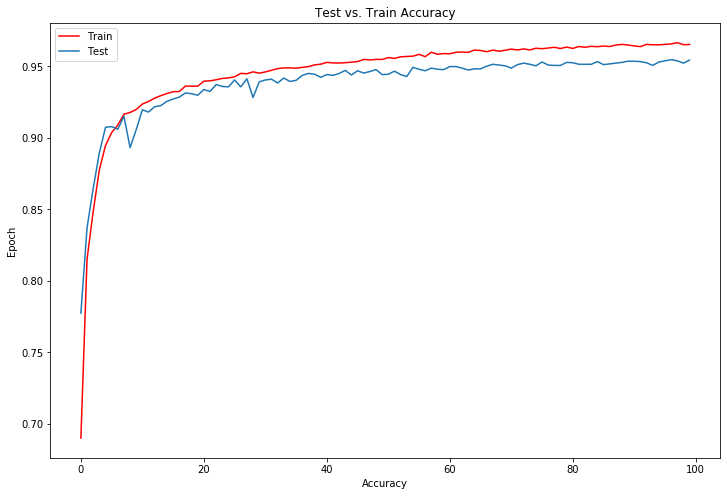

In [55]:
plt.figure(figsize = (12,8))
plt.plot(Monitor.history['accuracy'],color='red',label='Train')
plt.plot(Monitor.history['val_accuracy'],label='Test')
plt.title('Test vs. Train Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Epoch')
plt.legend()
plt.show()

In [56]:
from tensorflow.keras.models import load_model

# Restore the best model and calculate confusion matrices.

model = load_model('BestModel.h5')
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

cfm_train=tf.math.confusion_matrix(np.argmax(y_train, axis=1), 
                               np.argmax(y_train_pred, axis=1),                  
                               num_classes=3).numpy()

cfm_test=tf.math.confusion_matrix(np.argmax(y_test, axis=1), 
                               np.argmax(y_test_pred, axis=1),
                               num_classes=3).numpy()
print(cfm_train)
print(cfm_test)
# Access gradients history by 'GradsReal_loss.grads' and 'GradsReal_loss.gradsNorm'.

[[5051   62   87]
 [ 105 5000   40]
 [ 171   36 4423]]
[[1238   27   35]
 [  29 1240   17]
 [  50   13 1095]]


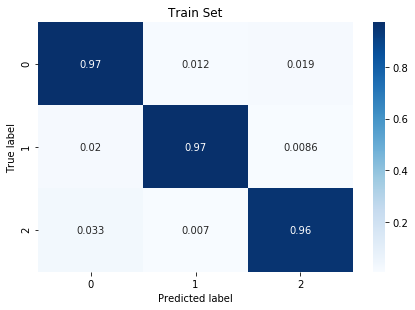

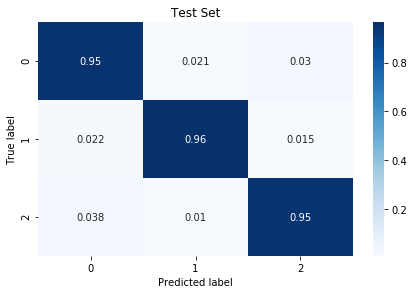

In [57]:
# a function to convert confusion matrix to percentage
def cfm2per(array):
  array=array/array.sum(axis=1)
  return(array)

# Turn to percentage and plot as heatmap
cfm_train=cfm2per(cfm_train)

sns.heatmap(cfm_train, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.title('Train Set')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

cfm_test=cfm2per(cfm_test)

sns.heatmap(cfm_test, annot=True,cmap=plt.cm.Blues)
plt.title('Test Set')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# 6. Analysis of hidden layer

In [0]:
Houtput = model.layers[0](X_train).numpy()

In [0]:
Houtput.shape

(14975, 93)

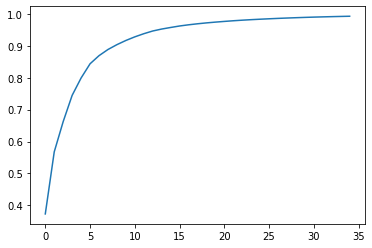

In [0]:
pca = PCA(35)
pca.fit(Houtput)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.hlines(0.95,0,187,'r')
#plt.vlines(29,0.4,1,'r')
plt.show()

In [0]:
# Average activities of H
label_train=np.argmax(y_train, axis=1)
PROF1=np.mean(Houtput[label_train==0],axis=0)
print(PROF1)

PROF2=np.mean(Houtput[label_train==1],axis=0)
print(PROF2)

PROF3=np.mean(Houtput[label_train==2],axis=0)
print(PROF3)

[5.0390959e-02 2.0013412e-02 2.8895584e-01 1.7639169e-02 1.2281486e-03
 6.8727285e-01 7.3706158e-02 4.2531210e-06 2.9531054e-02 1.9339341e-04
 3.6483473e-01 1.6206042e-01 3.8043913e-02 5.3832452e-03 3.3576530e-01
 0.0000000e+00 2.0380631e-01 2.2866772e-01 5.2535337e-01 6.0256743e-06
 7.9239096e-04 4.2902160e-02 4.2854872e-01 2.5536373e-02 1.9873227e-01
 3.1679356e-01 1.1642986e-04 0.0000000e+00 2.3331092e-01 2.0403048e-02
 4.6107018e-01 4.3542618e-01 4.7083637e-01 1.3842796e-01 3.8625332e-04
 3.3537021e-01 5.9217626e-01 5.3818113e-01 5.4675080e-02 9.6894987e-02
 6.2286969e-02 6.7743844e-01 5.0555348e-01 1.6440654e-01 5.0477380e-01
 8.5711980e-01 5.2854753e-01 4.4475129e-01 2.1455425e-01 2.8135958e-01
 4.1090906e-01 1.0814954e-01 2.4679545e-01 9.9189803e-02 1.0091806e-01
 3.7413964e-01 9.2988955e-03 7.7458256e-04 4.7167212e-01 1.2195742e-01
 5.2038832e-03 0.0000000e+00 3.0238330e-01 1.1904725e-04 2.6923519e-01
 4.1009910e-02 4.5905480e-01 5.9614417e-06 1.1680839e-04 5.9157562e-01
 3.899

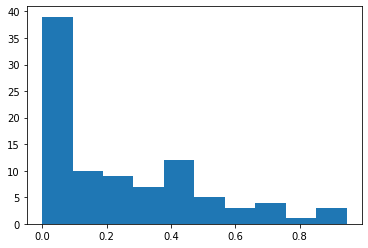

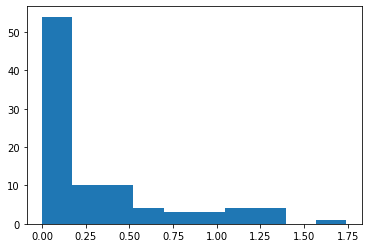

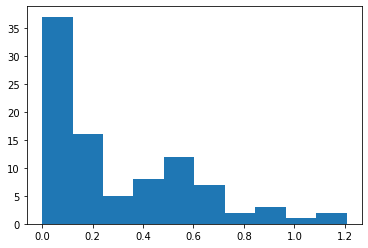

In [0]:
plt.hist(PROF1)
plt.show()
plt.hist(PROF2)
plt.show()
plt.hist(PROF3)
plt.show()

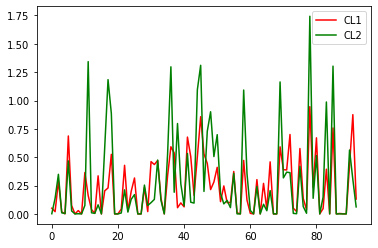

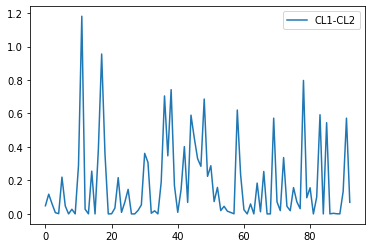

In [0]:
plt.plot(PROF1,'red',label="CL1")
plt.plot(PROF2,'green',label="CL2")
plt.legend()
plt.show()
plt.plot(np.abs(PROF1-PROF2),label="CL1-CL2")
plt.legend()
plt.show()


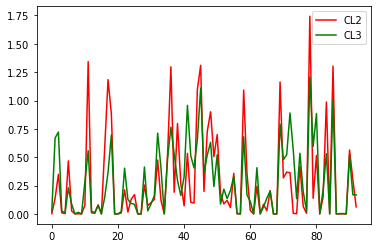

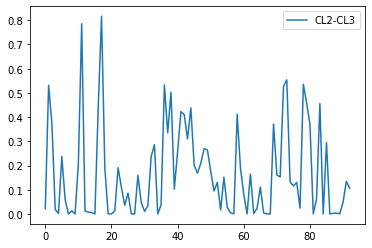

In [0]:
plt.plot(PROF2,'red',label="CL2")
plt.plot(PROF3,'green',label="CL3")
plt.legend()
plt.show()
plt.plot(np.abs(PROF2-PROF3),label="CL2-CL3")
plt.legend()
plt.show()

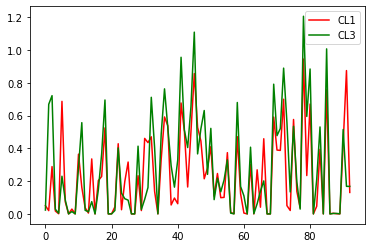

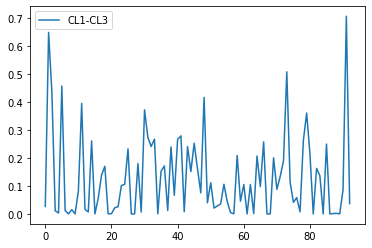

In [0]:
plt.plot(PROF1,'red',label="CL1")
plt.plot(PROF3,'green',label="CL3")
plt.legend()
plt.show()
plt.plot(np.abs(PROF1-PROF3),label="CL1-CL3")
plt.legend()
plt.show()

### Plot gradient norm (per Epoch (m))
